<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/XGBOOST_ML/blob/main/XGBOOST_resgreesor_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ADABOOST:**

**About Dataset [car_dekho]**


In [1]:
## importing th libraies:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
## calling csv as data:
path = "/content/car_dekho_clean.csv"
data  = pd.read_csv(path)
data.sample(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_kmpl,engine_cc,max_power_bhp,torque_kgm,rpm
4397,2007,200000,120000,Diesel,Individual,Manual,Second Owner,7.0,13.93,2702.0,138.10,32.65,2200.0
3989,2018,875000,142000,Diesel,Individual,Manual,First Owner,5.0,14.10,2179.0,147.94,32.65,2250.0
1431,2011,152000,80000,Diesel,Individual,Manual,First Owner,5.0,17.00,1405.0,71.00,135.00,2500.0


In [3]:
### checking the null values
print(f"\n null values:\n {data.isnull().sum()}\n")

## checking the sample:
print(f"\ndata_shape\n: {data.shape}\n")


## checking duplicated values:
print(f"duplicated values: {data.duplicated().sum()}\n")

# checking the info
data.info()


 null values:
 year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
seats            0
mileage_kmpl     0
engine_cc        0
max_power_bhp    0
torque_kgm       0
rpm              0
dtype: int64


data_shape
: (6717, 13)

duplicated values: 23

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6717 non-null   int64  
 1   selling_price  6717 non-null   int64  
 2   km_driven      6717 non-null   int64  
 3   fuel           6717 non-null   object 
 4   seller_type    6717 non-null   object 
 5   transmission   6717 non-null   object 
 6   owner          6717 non-null   object 
 7   seats          6717 non-null   float64
 8   mileage_kmpl   6717 non-null   float64
 9   engine_cc      6717 non-null   float64
 10  max_power_bhp  6717 non-null   flo

<ipython-input-4-7bd9d0871831>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='cool',annot=True);


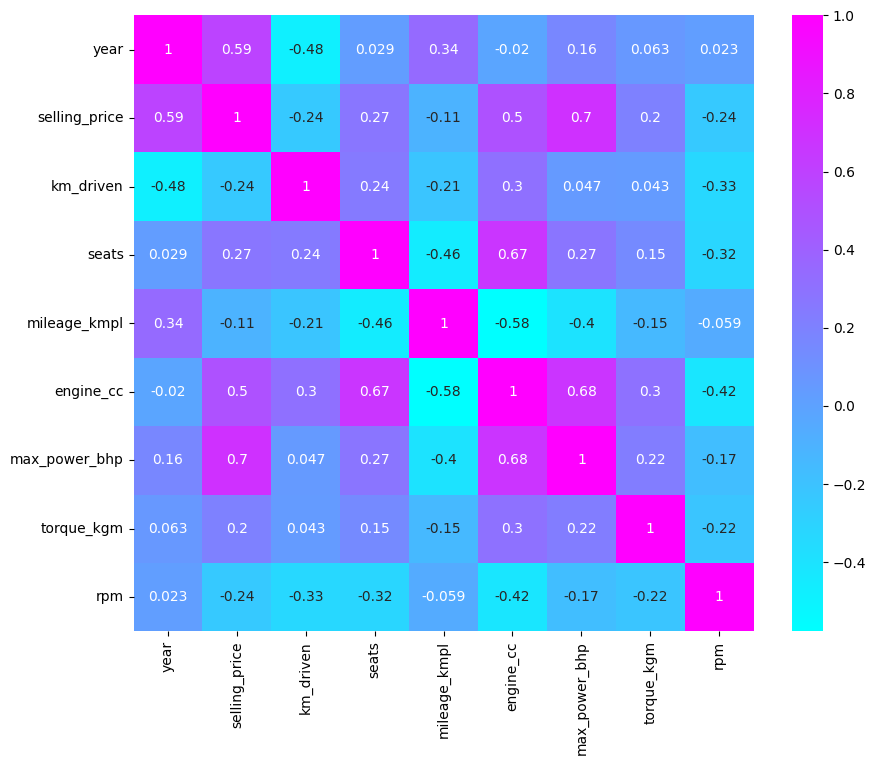

In [4]:

##plotting heatmap:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='cool',annot=True);



In [5]:
## spliting data into features and target values:
x = data.drop(columns = ["selling_price"],axis = 1)
y = data["selling_price"]
print(f"shape of feature dataset:{x.shape}")

shape of feature dataset:(6717, 12)


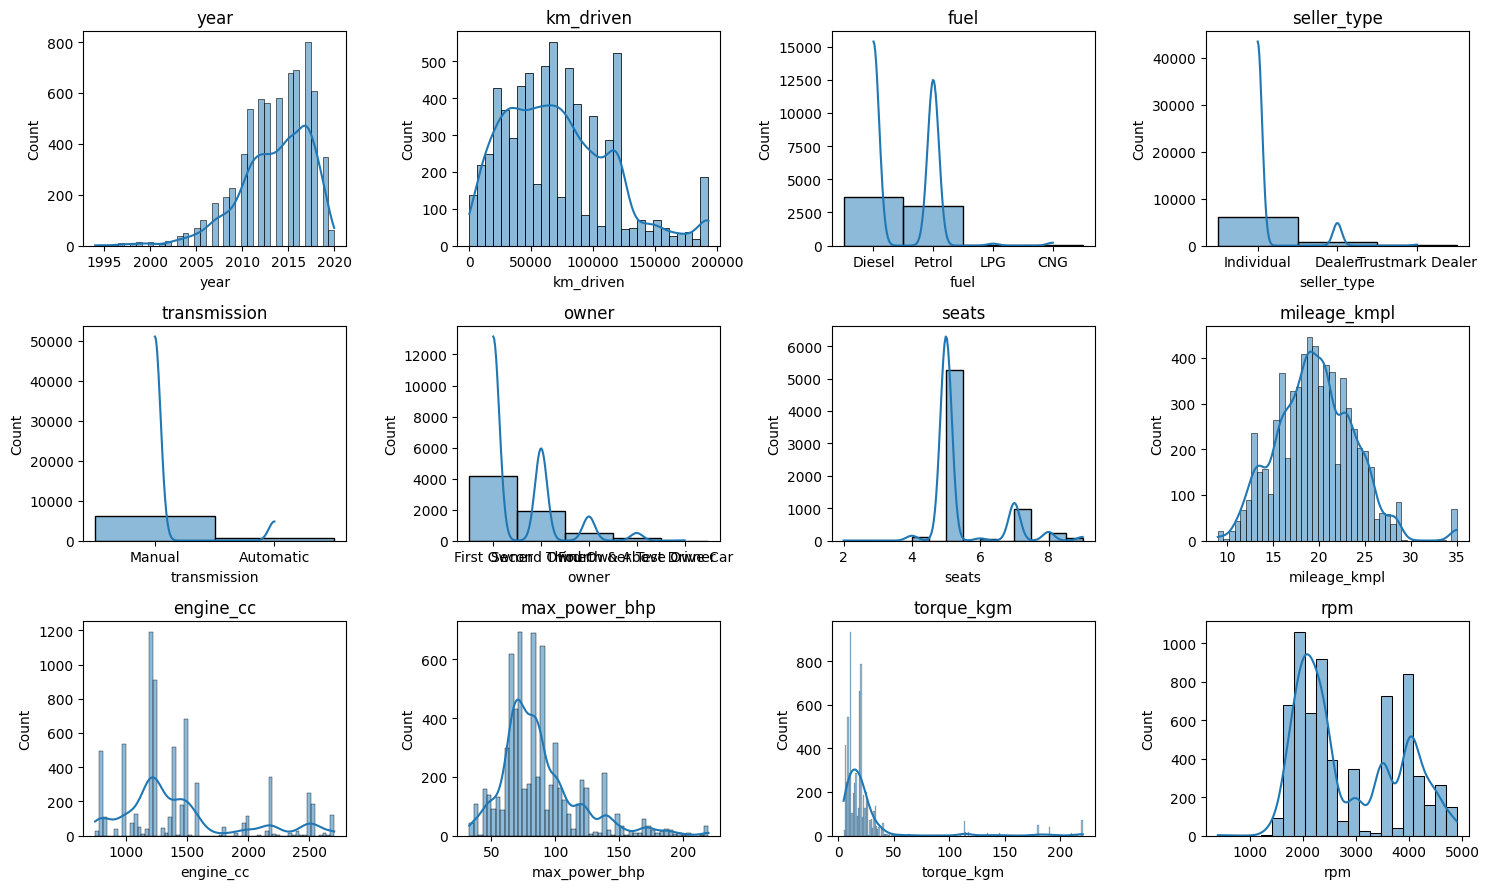

In [6]:
## ploting histplot:

num_rows = 3
num_cols = 4

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 9))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(x.columns):
    sns.histplot(x[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

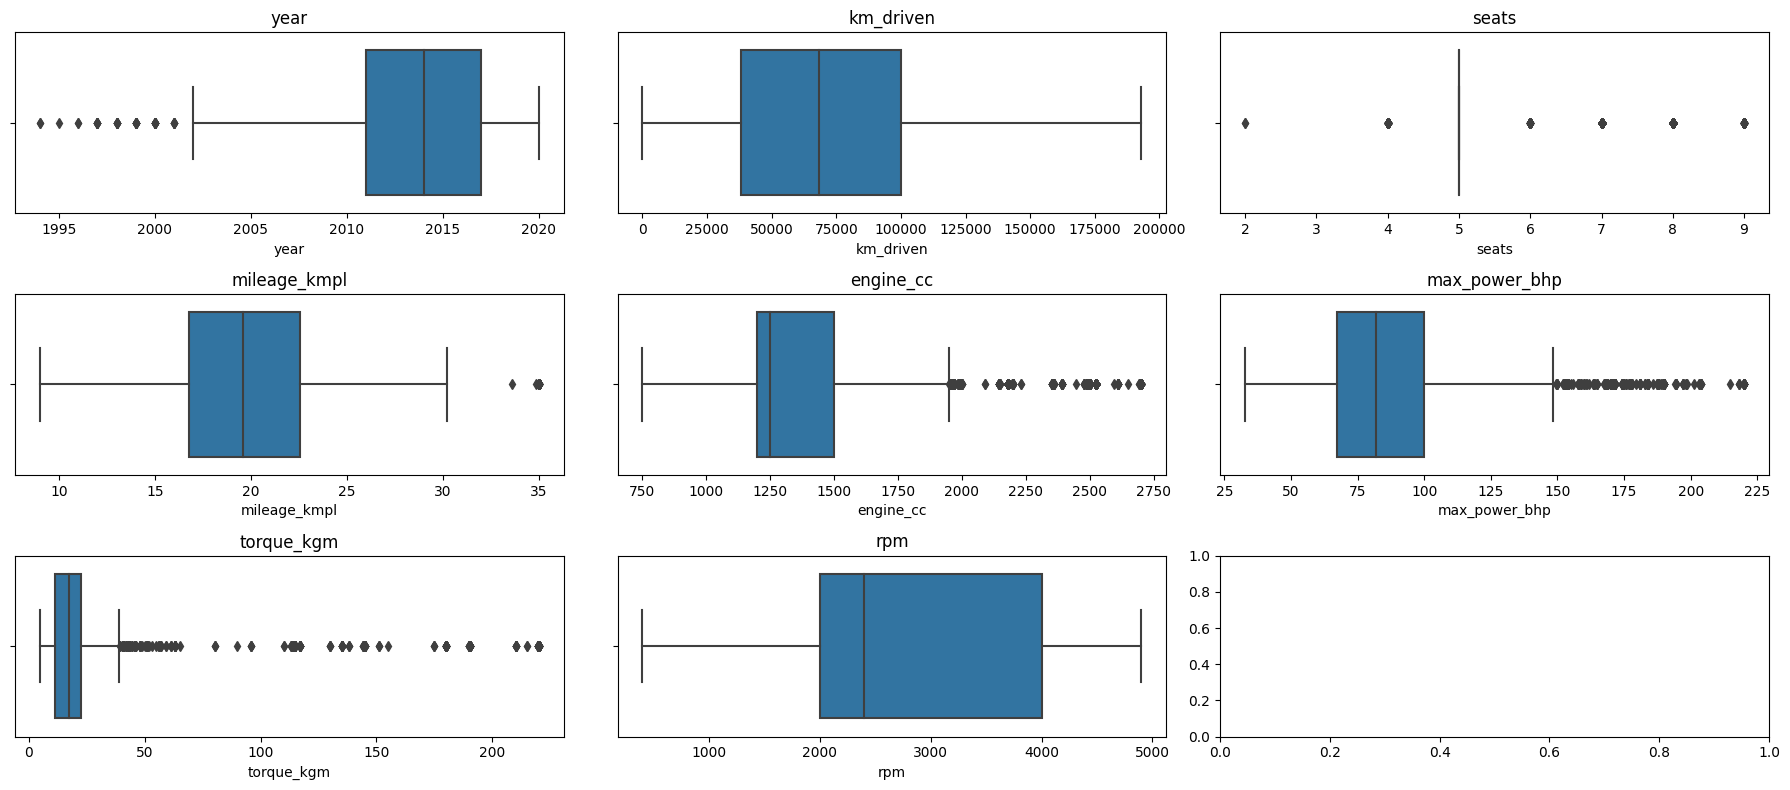

In [7]:
numerical_col = []
categorical_col = []
# Iterate through columns and check if they are numeric
for i in x.columns:
    if pd.api.types.is_numeric_dtype(x[i]):
        numerical_col.append(i)
    else:
        categorical_col.append(i)


num_rows = 3
num_cols = 3



# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(x[numerical_col]):
    sns.boxplot(data=x[numerical_col],x = col,ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [8]:

x.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6717.0,2013.611136,3.897402,1994.0,2011.0,2014.00,2017.00,2020.0
km_driven,6717.0,71633.997767,43625.945858,1.0,38000.0,68203.00,100000.00,193000.0
seats,6717.0,5.430847,0.968006,2.0,5.0,5.00,5.00,9.0
mileage_kmpl,6717.0,19.633220,4.226991,9.0,16.8,19.61,22.54,35.0
engine_cc,6717.0,1427.290606,480.526295,750.0,1197.0,1248.00,1498.00,2702.0
max_power_bhp,6717.0,87.591366,30.814253,32.8,67.1,81.83,100.00,220.0
torque_kgm,6717.0,24.393050,33.687235,4.8,11.4,17.55,22.40,220.0
rpm,6717.0,2861.756067,952.442428,400.0,2000.0,2400.00,4000.00,4900.0


In [9]:
## implimenting Onehot encoder:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder()
## data scaled
encode = OHE.fit_transform(x[categorical_col])
## fitting encode into frame with columns:
encode_frame = pd.DataFrame(encode.toarray(), columns = OHE.get_feature_names_out(categorical_col))

# Reset the index of encode_categories and data_num_frame
encode_frame = encode_frame.reset_index(drop=True)
data_numerical_frame = x[numerical_col].reset_index(drop=True)

# Concatenate the one-hot encoded categorical columns with the numerical columns
x_encode = pd.concat([encode_frame, data_numerical_frame], axis=1)
print("x_encode shape:",x_encode.shape)



x_encode shape: (6717, 22)


In [10]:
## import from sklearn
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## train test split:
x_train, x_test, y_train, y_test = train_test_split(x_encode,y, test_size = 0.2, random_state = 42)

## checking shape and dimention:
print("shape of x_train{} and have dimension: {}".format(x_train.shape, x_train.ndim))
print("shape of y_train{} and have dimension: {}" .format(y_train.shape, y_train.ndim))
print("shape of x_test{}  and have dimension: {}".format(x_test.shape, x_test.ndim))
print("shape of y_test{} and have dimension: {}".format(y_test.shape, x_test.ndim))

shape of x_train(5373, 22) and have dimension: 2
shape of y_train(5373,) and have dimension: 1
shape of x_test(1344, 22)  and have dimension: 2
shape of y_test(1344,) and have dimension: 2


In [11]:
## grid search cv searching best parameters:

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}


# Initialize the regressor
RFR = RandomForestRegressor()

# Initialize Grid Search CV
grid_search = GridSearchCV(RFR, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: nan


In [20]:
## selecting best feature using random forest
from sklearn.feature_selection import SelectFromModel

## parameter for RandomForestregressor
Best_Parameters ={'max_depth': None,
                  'min_samples_split': 2,
                  'n_estimators': 50
                  }

RFR_MODEL = RandomForestClassifier(**Best_Parameters)


RFR_MODEL_FIT = RFR_MODEL.fit(x_train, y_train)


# Perform feature selection
SFM = SelectFromModel(RFR_MODEL_FIT, threshold=0.05)  # Adjust the threshold as needed


SFM.fit(x_train, y_train)

# Transform the training and testing data
x_train_selected = SFM.transform(x_train)
x_test_selected = SFM.transform(x_test)


# Print the feature importances
x_train_col_names = []
for i in x_train.columns:
    x_train_col_names.append(i)

print("Feature Importances")

for i, importance in enumerate(RFR_MODEL_FIT.feature_importances_):
    print(f"Feature {x_train_col_names[i]}: {importance}")


Feature Importances
Feature fuel_CNG: 0.0007576600392822905
Feature fuel_Diesel: 0.003647156002913052
Feature fuel_LPG: 0.0007164807979795416
Feature fuel_Petrol: 0.004421568882697356
Feature seller_type_Dealer: 0.01068608376260743
Feature seller_type_Individual: 0.010706320899209419
Feature seller_type_Trustmark Dealer: 0.0013767992343431154
Feature transmission_Automatic: 0.006203034065882906
Feature transmission_Manual: 0.006344118882827013
Feature owner_First Owner: 0.02075414108735934
Feature owner_Fourth & Above Owner: 0.006314182076875754
Feature owner_Second Owner: 0.023642473718136617
Feature owner_Test Drive Car: 2.1929272313950255e-05
Feature owner_Third Owner: 0.01333332552616403
Feature year: 0.17522571936989192
Feature km_driven: 0.3409844502071502
Feature seats: 0.019468156096966477
Feature mileage_kmpl: 0.10144506497868029
Feature engine_cc: 0.050364470299440633
Feature max_power_bhp: 0.08785790845331345
Feature torque_kgm: 0.06838021795894883
Feature rpm: 0.04734873838

In [21]:
'''
## selecting best feature using random forest
from sklearn.feature_selection import SelectFromModel

## parameter for RandomForestClassifier
parameters = {
            'criterion': 'entropy',
            'max_depth': 10,
            'max_features': 'log2',
            'min_samples_leaf': 2,
            'min_samples_split': 10,
            'n_estimators': 100
            }

RFC_MODEL = RandomForestClassifier(**parameters)


RFC_MODEL_FIT = RFC_MODEL.fit(x_train, y_train)


# Perform feature selection
SFM = SelectFromModel(RFC_MODEL_FIT, threshold=0.090)  # Adjust the threshold as needed


SFM.fit(x_train, y_train)

# Transform the training and testing data
x_train_selected = SFM.transform(x_train)
x_test_selected = SFM.transform(x_test)


# Print the feature importances
x_train_col_names = []
for i in x_train.columns:
    x_train_col_names.append(i)

print("Feature Importances")

for i, importance in enumerate(RFC_MODEL_FIT.feature_importances_):
    print(f"Feature {x_train_col_names[i]}: {importance}")
'''

'\n## selecting best feature using random forest\nfrom sklearn.feature_selection import SelectFromModel\n\n## parameter for RandomForestClassifier\nparameters = {\n            \'criterion\': \'entropy\',\n            \'max_depth\': 10,\n            \'max_features\': \'log2\',\n            \'min_samples_leaf\': 2,\n            \'min_samples_split\': 10,\n            \'n_estimators\': 100\n            }\n\nRFC_MODEL = RandomForestClassifier(**parameters)\n\n\nRFC_MODEL_FIT = RFC_MODEL.fit(x_train, y_train)\n\n\n# Perform feature selection\nSFM = SelectFromModel(RFC_MODEL_FIT, threshold=0.090)  # Adjust the threshold as needed\n\n\nSFM.fit(x_train, y_train)\n\n# Transform the training and testing data\nx_train_selected = SFM.transform(x_train)\nx_test_selected = SFM.transform(x_test)\n\n\n# Print the feature importances\nx_train_col_names = []\nfor i in x_train.columns:\n    x_train_col_names.append(i)\n\nprint("Feature Importances")\n\nfor i, importance in enumerate(RFC_MODEL_FIT.feature

In [22]:
# # Apply K-means Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

STDS = StandardScaler()
train_feature = STDS.fit_transform(x_train_selected)
test_feature = STDS.transform(x_test_selected)


# Apply Unsupervised Learning (K-means Clustering) on the training
kmeans = KMeans(n_clusters = 5, n_init='auto')
cluster_assignments_train = kmeans.fit_predict(train_feature)
cluster_assignments_test = kmeans.predict(test_feature)

# Step 4: Combine Cluster Assignments with Original Features for both training and testing sets
X_train_combined = np.column_stack((x_train_selected, cluster_assignments_train))
X_test_combined = np.column_stack((x_test_selected, cluster_assignments_test))


Now we have new data :
- x_test_selected
- x_train_selected

In [23]:
'''
# Apply K-means Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

STDS = StandardScaler()
train_feature = STDS.fit_transform(x_train)
test_feature = STDS.transform(x_test)


# Apply Unsupervised Learning (K-means Clustering) on the training
kmeans = KMeans(n_clusters = 5, n_init='auto')
cluster_assignments_train = kmeans.fit_predict(train_feature)
cluster_assignments_test = kmeans.predict(test_feature)

# Step 4: Combine Cluster Assignments with Original Features for both training and testing sets
X_train_combined = np.column_stack((x_train, cluster_assignments_train))
X_test_combined = np.column_stack((x_test, cluster_assignments_test))
'''

"\n# Apply K-means Clustering\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.cluster import KMeans\n\nSTDS = StandardScaler()\ntrain_feature = STDS.fit_transform(x_train)\ntest_feature = STDS.transform(x_test)\n\n\n# Apply Unsupervised Learning (K-means Clustering) on the training\nkmeans = KMeans(n_clusters = 5, n_init='auto') \ncluster_assignments_train = kmeans.fit_predict(train_feature)\ncluster_assignments_test = kmeans.predict(test_feature)\n\n# Step 4: Combine Cluster Assignments with Original Features for both training and testing sets\nX_train_combined = np.column_stack((x_train, cluster_assignments_train))\nX_test_combined = np.column_stack((x_test, cluster_assignments_test))\n"

In [24]:
## final model training:[Initializing and train the XGBoost regressor]

from xgboost import XGBRegressor
## importing performance matrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

# Initialize the XGBoost regressor
def xgb_base(booster):

    xgb_regressor = XGBRegressor(booster = booster)
    XGB_model = xgb_regressor.fit(X_train_combined, y_train)

    # Predict the target variable on the test set
    y_preds = XGB_model.predict(X_test_combined)


    ## performance matric mean square error:
    mean_sq_error = mse(y_test,y_preds)
    print(f"mean_square_error : {np.round(mean_sq_error,1)}")


    ## Root mean squared error:
    rmse = np.sqrt(mean_sq_error)
    print(f"Root_mean_squared_error:{np.round(rmse,1)}")


    ## performance matric mean absolute error:
    mean_abs_error = mae(y_test,y_preds)
    rounded_mae = round(mean_abs_error, 1)
    print(f"mean_absolute_error : {rounded_mae}")

    # Calculate R-squared
    r_squared = r2_score(y_test, y_preds)
    rounded_r_squared = round(r_squared, 1)
    print(f"R-squared: {rounded_r_squared}")

    # Calculate Adjusted R-squared
    p = 12
    n=len(y_test)
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

    print(f"Adjusted R-squared: {np.round(adjusted_r_squared,2)}")

    return y_preds


In [25]:
## compairing the prediction with truth values:
"""
print("y_pred dimensions :",y_pred.ndim)
print("y_test dimension :", y_test.ndim)
y_pred_flatten = y_pred.flatten()
y_test_flatten = y_test.values.flatten()
print(y_pred_flatten.ndim)
print(y_test_flatten.ndim)
"""

def prediction_tab(y_test, y_pred):

    prediction_result = []
    Squared_difference = []
    absolute_difference = []
    j=0
    for i in y_test:
        diff = i - y_pred[j]
        prediction_result.append(int(diff))
        j = j+1

    for i in prediction_result:
        mse = i*i
        Squared_difference.append(mse)
        absolute_difference.append(abs(i))

    prediction_table = pd.DataFrame({'Actual': y_test, 'Predict' : (np.round(y_pred,0)) , "(Actual-preds)" : prediction_result, "Squared_difference":np.round(Squared_difference,2), 'absolute_difference': absolute_difference })
    return prediction_table.sample(10)


In [26]:
## predictions: #gbtree/gblinear/dart
y_pred_gbt = xgb_base('gbtree')


mean_square_error : 8894790433.3
Root_mean_squared_error:94312.2
mean_absolute_error : 63004.4
R-squared: 0.9
Adjusted R-squared: 0.91


In [27]:
## prediction table :
prediction_tab(y_test, y_pred_gbt)


,Actual,Predict,(Actual-preds),Squared_difference,absolute_difference
1840,1100000,935753.0,164246,26976748516,164246
1726,140000,157647.0,-17646,311381316,17646
5316,400000,441734.0,-41734,1741726756,41734
6470,280000,285212.0,-5211,27154521,5211
2862,300000,310492.0,-10491,110061081,10491
3130,155000,129365.0,25635,657153225,25635
3227,300000,394623.0,-94622,8953322884,94622
6046,375000,356695.0,18305,335073025,18305
6322,800000,732263.0,67737,4588301169,67737
1728,1420000,1405352.0,14648,214563904,14648


___